In [217]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.model_selection import train_test_split

file_directory = 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data'
file_folders = ['/bully_data','/drug_data','/fight_assault_data','/SH_data','/vandalism_data']
file = '/a_teacher_focused_approach.txt'

file_1 = open(file_directory+file_folders[0]+file,'r',encoding = 'UTF-8') 
file_2 = file_1.read()

In [219]:
file_2.split()

['Teacher-Focused',
 'Approach',
 'to',
 'Prevent',
 'and',
 'Reduce',
 'Students’',
 'Aggressive',
 'Behavior',
 'The',
 'GREAT',
 'Teacher',
 'Program',
 'Pamela',
 'Orpinas,',
 'PhD,',
 'Arthur',
 'M.',
 'Horne,',
 'PhD,',
 'and',
 'the',
 'Multisite',
 'Violence',
 'Prevention',
 'Project',
 'Abstract:',
 'The',
 'purpose',
 'of',
 'this',
 'article',
 'is',
 'to',
 'describe',
 'the',
 'GREAT',
 '(Guiding',
 'Responsibility',
 'and',
 'Expectations',
 'for',
 'Adolescents',
 'for',
 'Today',
 'and',
 'Tomorrow)',
 'Teacher',
 'Program,',
 'a',
 'prevention',
 'program',
 'for',
 'middle',
 'school',
 'teachers',
 'to',
 'deter',
 'students’',
 'aggressive',
 'behavior.',
 'It',
 'was',
 'developed',
 'on',
 'the',
 'basis',
 'of',
 'an',
 'ecologic',
 'understanding',
 'of',
 'aggression',
 'and',
 'on',
 'specific',
 'constructs',
 'of',
 'Social',
 'Cognitive',
 'Theory.',
 'The',
 'goals',
 'of',
 'the',
 'program',
 'were',
 '(1)',
 'to',
 'increase',
 'teacher',
 'awareness',

In [167]:
glob.glob(file_directory+file_folders[0]+"/*.txt")

['C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\a_teacher_focused_approach.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\bullying_among_young_adolescents.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\bullying_in_schools.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\bullying_who_does_what.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\bully_and_their_victims.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\conflict_resolution.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\definitions_of_bullying.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Data/bully_data\\observations_of_bullying.txt',
 'C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_

In [206]:
import glob

def insert_to_dict(aDict,name, text_1):
    if not name in aDict:
        aDict[name] = [(" "+text_1)]
    else:
        aDict[name].append(" " + text_1)

violence_dict = {'Bully_Data':[],'Drug_Data':[],'FA_Data':[],'SH_Data':[],'Vandalism_Data':[]}
keys = ['Bully_Data','Drug_Data','FA_Data','SH_Data','Vandalism_Data']
# violence_dict = {key: None for key in keys}

for i in keys:
    place = keys.index(i)
    all_files = glob.glob(file_directory+file_folders[place]+"/*.txt")
    for file in (all_files):
        current_file = open(file,'r',encoding = 'latin-1').read()
        insert_to_dict(violence_dict, i, current_file)



# def change_word(word):
#     for letter in word:
#         if letter == '\\':
#             word = word.replace(letter,"/")
#     return word
#violence_dict['Bully_Data']

In [214]:
violence_dict['SH_Data'][0]

' \nSexual Harassment Victimization and Perpetration Among High School Students\n\n\n\n\nAbstract\nThis large, population-based study is one of the few to examine prevalence rates\nof sexual harassment occurring during the past 12 months by victimization and\nperpetration among adolescents. In this large, cross-sectional survey of students\nattending 26 high schools, sexual harassment was defined using three questions\nfrom the Sexual Experiences Questionnaire. Among 18,090 students completing the\nsurvey, 30% disclosed sexual harassment victimization (37% of females, 21% of males)\nand 8.5% reported perpetration (5% of females, 12% of males). Sexual harassment\nperpetration was highly correlated with male sex, minority race/ethnicity, same-sex\nattraction, bullying, alcohol binge drinking, and intraparental partner violence.\nKeywords\nadolescents, high school, perpetration, sexual harassment, victimization\nAlthough sexual harassment has often been associated with the adult workplace

In [226]:
from collections import Counter
from nltk.corpus import stopwords

for type_violence in violence_dict:
    for paper in violence_dict[type_violence]:
        words_1 = paper.lower().split()
        filtered_words = [word for word in words_1 if word not in stopwords.words('english')]
        wordcount = Counter(filtered_words)
        print(type_violence, wordcount.most_common(3))

Vandalism_Data [('c', 75), ('school', 75), ('â«', 54)]
Vandalism_Data [('school', 33), ('youngsters', 15), ('vandalism', 11)]
Vandalism_Data [('richmond', 22), ('man', 21), ('charged', 21)]
Vandalism_Data [('school', 78), ('vandalism', 71), ('schools', 59)]
Vandalism_Data [('school', 46), ('vandalism', 33), ('-', 30)]
Vandalism_Data [('school', 165), ('v.', 134), ('student', 71)]
Vandalism_Data [('vandal', 82), ('behavior', 50), ('activity', 45)]
Vandalism_Data [('school', 344), ('vandalism', 161), ('community', 66)]
Vandalism_Data [('=', 206), ('residence', 166), ('size', 95)]
Vandalism_Data [('.', 28), ('sense', 19), ('individual', 18)]
SH_Data [('sexual', 158), ('harassment', 112), ('victimization', 67)]
SH_Data [('sexual', 321), ('harassment', 174), ('&', 145)]
SH_Data [('sexual', 214), ('harassment', 158), ('bullying', 148)]
SH_Data [('sexual', 138), ('&', 75), ('harassment', 70)]
SH_Data [('&', 99), ('bullying', 91), ('students', 90)]
SH_Data [('sexual', 130), ('harassment', 91),

In [164]:
new_list=[]
for i in x:
    change_word(i)
    new_list.append(i)
new_list

['Vandalism_Data', 'SH_Data', 'Drug_Data', 'Bully_Data', 'FA_Data']

In [56]:
file_3 = file_2.lower().split()

In [92]:
from collections import Counter
wordcount = Counter(file_3)
print(wordcount.most_common(10))

[('the', 369), ('and', 284), ('of', 252), ('to', 232), ('in', 123), ('a', 114), ('teachers', 94), ('for', 84), ('is', 71), ('are', 65)]


In [58]:
from nltk.corpus import stopwords
filtered_words = [word for word in file_3 if word not in stopwords.words('english')]

In [91]:
wordcount = Counter(filtered_words)
print(wordcount.most_common(10))

[('teachers', 94), ('teacher', 58), ('program', 45), ('school', 43), ('support', 38), ('great', 36), ('students', 35), ('aggression', 32), ('prevention', 31), ('classroom', 29)]


In [93]:
def find_count_word(word):
    return wordcount[word]

94

In [64]:
import urllib.request
path = 'http://www.unc.edu/~ncaren/haphazard/negative.txt'
with urllib.request.urlopen(path) as response:
    negData = response.read()
path1 = 'http://www.unc.edu/~ncaren/haphazard/positive.txt'
with urllib.request.urlopen(path1) as response:
    posData = response.read()
    
print(negData[:100])
print(posData[:100])

b'abandoned\nabandonment\naberration\naberration\nabhorred\nabhorrence\nabhorrent\nabhorrently\nabhors\nabhors\n'
b'abidance\nabidance\nabilities\nability\nable\nabove\nabove-average\nabundant\nabundance\nacceptance\nacceptabl'


In [67]:
file_directory = "C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Danny's Files"
file = '/neg_text.txt'

with open(file_directory+file, "r") as f:
    negText = f.read()
negTokens = negText.split("\n") # This splits the text file into tokens on the new line character
negTokens[-1:] = [] # This strips out the final empty item
print(negTokens[-10:])

['wretched', 'wretchedly', 'wretchedness', 'wrong', 'wrongful', 'wrought', 'wrought', 'yawn', 'zealot', 'zealous']


In [72]:
file_directory = "C:/Users/danil/Documents/GitHub/Lantern_v2-master/Lantern_v2-master/Danny's Files"
file = '/pos_text.txt'

with open(file_directory+file, "r") as f:
    posText = f.read()
posTokens = posText.split("\n") # This splits the text file into tokens on the new line character
posTokens[-1:] = [] # This strips out the final empty item
print(posTokens[-10:])

['worthiness', 'worthwhile', 'worthy', 'wow', 'wry', 'yearning', 'yearningly', 'youthful', 'zeal', 'zenith']


In [76]:
tweetsText = file_2
tweetsTokens = tweetsText.split("\n") # This splits the text file into tokens on the new line character
tweetsTokens[-1:] = [] # This strips out the final empty item
print(tweetsTokens[5:8])

['The purpose of this article is to describe the GREAT (Guiding Responsibility and Expectations for Adolescents for Today and Tomorrow) Teacher Program, a prevention program for middle school teachers to deter students’ aggressive behavior. It was developed on the basis of an ecologic understanding of aggression and on specific constructs of Social Cognitive Theory. The goals of the program were (1) to increase teacher awareness of different types of aggression, risk factors, role of the classroom teacher, and influence of the school climate on the child’s behavior; (2) to develop strategies that will prevent aggression; (3) to improve teacher management skills to reduce power struggles and aggression; and (4) to enhance skills to assist students who are the targets of aggression. To accomplish these goals, teachers participated in a 12-hour workshop and 10 support group sessions. Training, manuals, and supervision were provided to maintain program integrity and to assure the quality o

In [77]:
import re
def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def calculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
    
    sum = (numPosWords - numNegWords)
    return sum

In [78]:
# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

# This prints out the results        
print("Total: " + str(numTweets) + "\n" + "Positive: " + str(numPosTweets) + "\n" + "Neutral: " + str(numNeutTweets) + "\n" + "Negative: " +str(numNegTweets))

Total: 186
Positive: 30
Neutral: 110
Negative: 46


In [80]:
# Here we set up the threshold.
posi = 1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numPosTweets = 0
posiTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc > posi and numPosTweets < numberWanted:
        numPosTweets += 1
        posiTweetList.append(tweet)

print(posiTweetList)

['The GREAT Teacher Program is based on an ecologic model used to explain the interplay of personal, socio- cultural, policy, and physical-environmental factors that may be associated with aggression.14 This multilevel approach, depicted in Figure 1, is used to describe the problem and to determine the array of interventions that are necessary to prevent and reduce aggression. The problem of school aggression, as well as its solu- tion, is conceptualized to be a function of contributions from several different levels of influence (top section of Figure 1). Although the GREAT Student Program15 focuses on the behaviors and cognitions of students and how they interact with their peers and teachers, and the GREAT Families Program16 focuses on the students’ families, the GREAT Teacher Program focuses on the teachers and the school environment. Within the school, another ecologic model can be described, as presented in the bottom section of Figure 1. The model reflects the multiple factors w

In [81]:
# Here we set up the threshold.
nega = -1 # This means there have to be more than 1 positive word
numberWanted = 4 # Here you decide how many tweets you want

# Here we prime our variables
numTweets = 0
numNegTweets = 0
negaTweetList = []

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = calculator(tweet)
    if calc < nega and numNegTweets < numberWanted:
        numNegTweets += 1
        negaTweetList.append(tweet)

print(negaTweetList)

['endorse aggressive behaviors than were students receiv- ing fewer lessons from their teachers.6 This difference in implementation could be due to a stronger commit- ment from teachers. Second, student aggression is not an isolated event. It occurs in a context that involves peers, teachers, administrators, and, in general, char- acteristics of the school environment. Modifying the school environment, including teachers’ attitudes and behaviors, may be an important factor to consider in reducing aggression. On occasions, teachers who vic- timize students in the name of discipline may contrib- ute to student aggression.7 Most frequently, teachers can play a fundamental role in preventing bullying behavior.8,9 Third, students are not the only victims of aggression. Results from a national survey of public school teachers conducted in the 1999 –2000 academic year indicated that almost 10% of teachers had been threatened with injury, and 4% had been physically attacked by a student during

In [82]:
import re
posWordsList = []
negWordsList = []

def tokenizer(theText):
    theTokens = re.findall(r'\b\w[\w-]*\b', theText.lower())
    return theTokens

def wordsCalculator(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)

tweet2Process = input("What tweet do you want to process? ")
wordsCalculator(tweet2Process)
print("Positive words: " + str(posWordsList[:10]))
print("Positive words: " + str(negWordsList[:10]))

What tweet do you want to process? bad bad bad
Positive words: []
Positive words: ['bad', 'bad', 'bad']


In [83]:
import re

# Here we set up the thresholds
posi = 1 # This means there have to be more than 1 positive word
nega = 0 # This means there has to be more than 1 negative words

# Here we prime our variables
posWordsList = []
negWordsList = []
numTweets = 0
numPosTweets = 0
numNegTweets = 0
numNeutTweets = 0

def wordsGathering(theTweet):
    # Count positive words
    numPosWords = 0
    theTweetTokens = tokenizer(theTweet)
    for word in theTweetTokens:
        if word in posTokens:
            numPosWords += 1
            posWordsList.append(word)
            
    # Count negative words
    numNegWords = 0
    for word in theTweetTokens:
        if word in negTokens:
            numNegWords += 1
            negWordsList.append(word)       
    
    sum = (numPosWords - numNegWords)
    return sum

# This loop goes through all the Tweets and calculates if sums the number of positive or negative ones.
for tweet in tweetsTokens:
    calc = wordsGathering(tweet)
    if calc > posi:
        numPosTweets += 1
        numTweets += 1
    elif calc < nega:
        numNegTweets += 1
        numTweets += 1
    else:
        numNeutTweets += 1
        numTweets += 1

print("Positive words: " + str(len(posWordsList)))
print("Positive words: " + str(len(negWordsList)))

Positive words: 305
Positive words: 233


      support         great      positive          help          will     important        values    successful understanding       success 
           38            38            24            18            12            10             9             7             6             5 


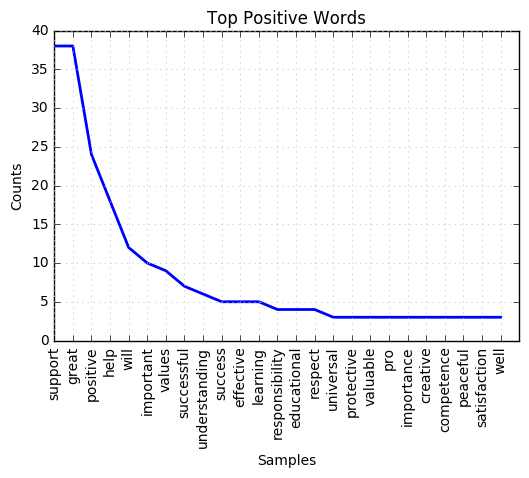

In [84]:
import nltk, matplotlib

posDist = nltk.FreqDist(posWordsList)
posDist.tabulate(10)

%matplotlib inline
posDist.plot(25, title="Top Positive Words")

aggression    problem   problems  emotional       need       risk   conflict     stress      bully   negative 
        66         26         15         10          9          8          8          7          7          7 


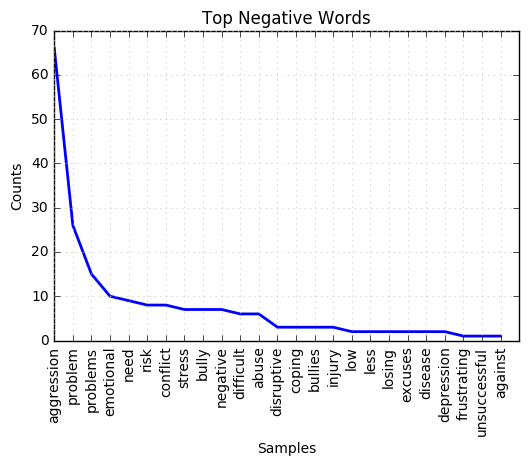

In [85]:
import nltk, matplotlib

negDist = nltk.FreqDist(negWordsList)
negDist.tabulate(10)

%matplotlib inline
negDist.plot(25, title="Top Negative Words")

ImportError: No module named 'genism'